<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1)

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

#### 1. Load Data

In [ ]:
# Read Data
diabetes = pd.read_csv('diabetes.csv')

#### 2. Perform EDA

In [ ]:
# Check Head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check Data Types
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check Null Values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

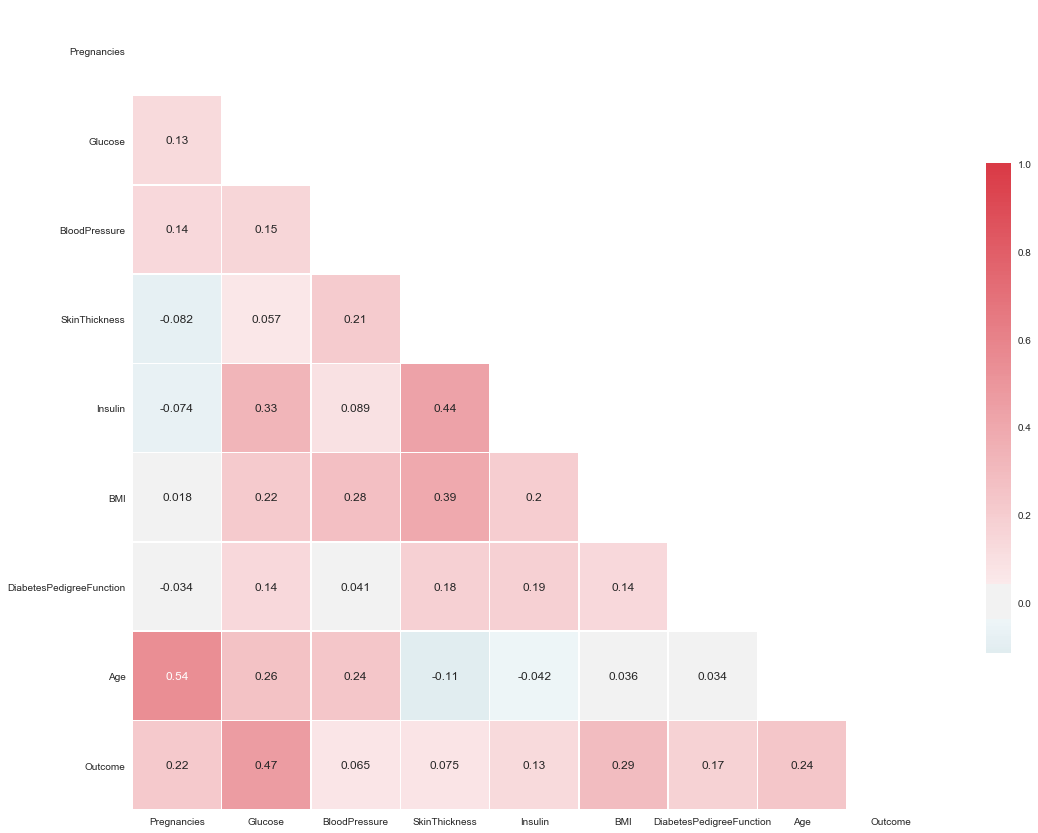

In [ ]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(diabetes.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(diabetes.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### 3. Set Target

In [ ]:
target_column = 'Outcome'
feature_columns = [c for c in diabetes.columns if c != target_column]

In [ ]:
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
y = diabetes[target_column]
X = diabetes[feature_columns]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [ ]:
# Create an instance of SelectKBest
kbest = SelectKBest(score_func=chi2, k=4)

In [ ]:
# Fit
fit = kbest.fit(X, y)

In [ ]:
# Print Score
# Find Top 4 Features
pd.DataFrame(fit.scores_, index=feature_columns)

,0
Pregnancies,111.519691
Glucose,1411.887041
BloodPressure,17.605373
SkinThickness,53.108040
Insulin,2175.565273
BMI,127.669343
DiabetesPedigreeFunction,5.392682
Age,181.303689


In [ ]:
# Transform X to Features
features = fit.transform(X)

In [ ]:
# Transform features to a dataframe
pd.DataFrame(features)

,0,1,2,3
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0
5,116.0,0.0,25.6,30.0
6,78.0,88.0,31.0,26.0
7,115.0,0.0,35.3,29.0
8,197.0,543.0,30.5,53.0
9,125.0,0.0,0.0,54.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [ ]:
# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_)
print("Selected Features: %s", fit.support_)
print("Feature Ranking: %s", fit.ranking_)

Num Features: %d 4
Selected Features: %s [ True  True False False False  True  True False]
Feature Ranking: %s [1 1 2 4 5 1 1 3]


In [ ]:
# Print Score
# Find Top 4 Features
pd.DataFrame(fit.support_, index=feature_columns)

,0
Pregnancies,True
Glucose,True
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,True
DiabetesPedigreeFunction,True
Age,False




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



